<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-70.190902,71.686066,112.882006,-41.195940
1,0.0,1.0,68.557615,73.345181,37.909268,33.229305,223.041369,26.265960,196.775409
2,0.0,2.0,74.849614,76.130482,52.715544,408.016376,621.712016,-37.870549,659.582566
3,0.0,3.0,27.157307,97.588727,82.828396,-1911.322652,-1693.748223,-277.286651,-1416.461572
4,0.0,4.0,50.344053,84.376157,78.431236,-355.662911,-132.511465,-183.046183,50.534718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-676.722269,-535.452124,-165.662092,-369.790032
29996,999.0,26.0,66.857273,88.314641,55.994911,-183.736066,37.430760,126.473498,-89.042739
29997,999.0,27.0,98.850813,77.493794,78.415525,284.223067,548.983199,284.910714,264.072484
29998,999.0,28.0,91.183790,24.032265,66.630093,-62.437240,129.408908,124.407047,5.001862


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-70.190902,71.686066,112.882006,-41.195940
1,0.0,1.0,68.557615,73.345181,37.909268,33.229305,223.041369,26.265960,196.775409
2,0.0,2.0,74.849614,76.130482,52.715544,408.016376,621.712016,-37.870549,659.582566
3,0.0,3.0,27.157307,97.588727,82.828396,-1911.322652,-1693.748223,-277.286651,-1416.461572
4,0.0,4.0,50.344053,84.376157,78.431236,-355.662911,-132.511465,-183.046183,50.534718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-676.722269,-535.452124,-165.662092,-369.790032
29996,999.0,26.0,66.857273,88.314641,55.994911,-183.736066,37.430760,126.473498,-89.042739
29997,999.0,27.0,98.850813,77.493794,78.415525,284.223067,548.983199,284.910714,264.072484
29998,999.0,28.0,91.183790,24.032265,66.630093,-62.437240,129.408908,124.407047,5.001862


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    26.676458  20.137417  ...  112.882006   -41.195940
      1.0    68.557615  73.345181  ...   26.265960   196.775409
      2.0    74.849614  76.130482  ...  -37.870549   659.582566
      3.0    27.157307  97.588727  ... -277.286651 -1416.461572
      4.0    50.344053  84.376157  ... -183.046183    50.534718
...                ...        ...  ...         ...          ...
999.0 25.0   49.458661  58.888732  ... -165.662092  -369.790032
      26.0   66.857273  88.314641  ...  126.473498   -89.042739
      27.0   98.850813  77.493794  ...  284.910714   264.072484
      28.0   91.183790  24.032265  ...  124.407047     5.001862
      29.0   72.376674  97.198664  ...  403.028026   437.035417

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    26.676458  20.137417  ...  112.882006   -41.195940
      1.0    68.557615  73.345181  ...   26.265960   196.775409
      2.0    74.849614  76.130482  ...  -37.870549   659.582566
      3.0    27.157307  97.588727  ... -277.286651 -1416.461572
      4.0    50.344053  84.376157  ... -183.046183    50.534718
...                ...        ...  ...         ...          ...
999.0 25.0   49.458661  58.888732  ... -165.662092  -369.790032
      26.0   66.857273  88.314641  ...  126.473498   -89.042739
      27.0   98.850813  77.493794  ...  284.910714   264.072484
      28.0   91.183790  24.032265  ...  124.407047     5.001862
      29.0   72.376674  97.198664  ...  403.028026   437.035417

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-70.190902,71.686066,112.882006,-41.195940
1,0.0,1.0,68.557615,73.345181,37.909268,33.229305,223.041369,26.265960,196.775409
2,0.0,2.0,74.849614,76.130482,52.715544,408.016376,621.712016,-37.870549,659.582566
3,0.0,3.0,27.157307,97.588727,82.828396,-1911.322652,-1693.748223,-277.286651,-1416.461572
4,0.0,4.0,50.344053,84.376157,78.431236,-355.662911,-132.511465,-183.046183,50.534718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-676.722269,-535.452124,-165.662092,-369.790032
29996,999.0,26.0,66.857273,88.314641,55.994911,-183.736066,37.430760,126.473498,-89.042739
29997,999.0,27.0,98.850813,77.493794,78.415525,284.223067,548.983199,284.910714,264.072484
29998,999.0,28.0,91.183790,24.032265,66.630093,-62.437240,129.408908,124.407047,5.001862


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    26.676458  20.137417  ...  112.882006   -41.195940
      1.0    68.557615  73.345181  ...   26.265960   196.775409
      2.0    74.849614  76.130482  ...  -37.870549   659.582566
      3.0    27.157307  97.588727  ... -277.286651 -1416.461572
      4.0    50.344053  84.376157  ... -183.046183    50.534718
...                ...        ...  ...         ...          ...
999.0 25.0   49.458661  58.888732  ... -165.662092  -369.790032
      26.0   66.857273  88.314641  ...  126.473498   -89.042739
      27.0   98.850813  77.493794  ...  284.910714   264.072484
      28.0   91.183790  24.032265  ...  124.407047     5.001862
      29.0   72.376674  97.198664  ...  403.028026   437.035417

[30000 rows x 7 columns]

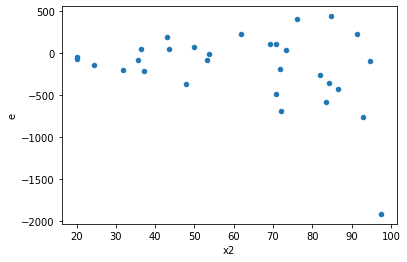

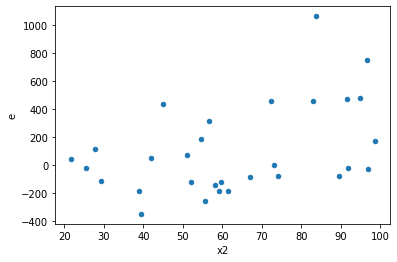

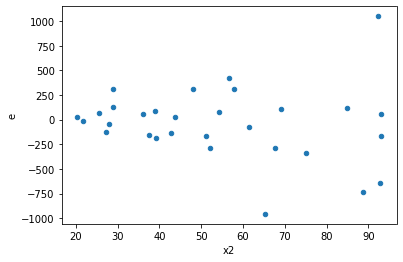

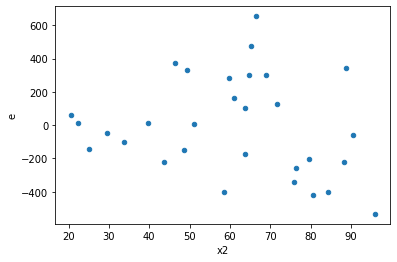

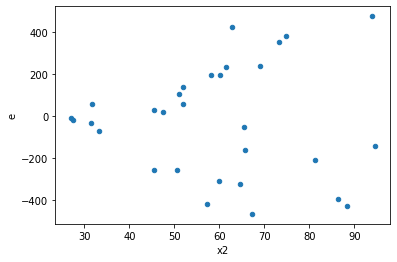

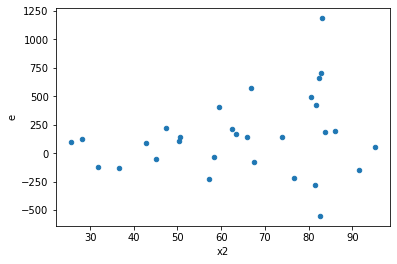

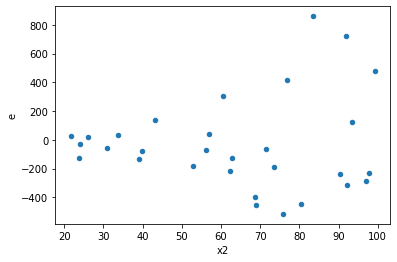

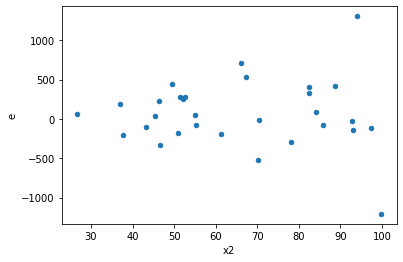

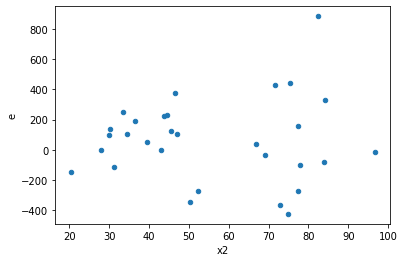

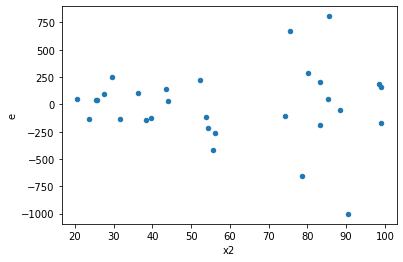

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,210699.17950392593,3552692.848433966,23411.01994488066,394743.6498259962,16.8614460521322,0.0002613976721326239,0.9998693011639337,0.00013069883606631194,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,497758.9938695949,1366269.6205144448,55306.55487439943,151807.7356127161,2.744841654980495,0.14862121404727535,0.9256893929763623,0.07431060702363768,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,187848.65724164003,2659138.7683093525,20872.07302684889,295459.8631454836,14.155750737620426,0.0005312597640754202,0.9997343701179623,0.0002656298820377101,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,499761.873885956,782833.7365252213,55529.09709843955,86981.52628058015,1.5664134809608574,0.5143108814504791,0.7428445592747605,0.25715544072523955,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,158080.81135230287,1204001.4910321676,17564.53459470032,133777.94344801863,7.616367101943194,0.005783033249643799,0.9971084833751781,0.0028915166248218993,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,319676.8395861769,1792299.9681289755,35519.648842908544,199144.4409032195,5.6065993721944825,0.01708048829802422,0.9914597558509879,0.00854024414901211,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,39822.832352591715,2407535.160130896,4424.759150287969,267503.9066812107,60.45615085372527,1.1301725628687365e-06,0.9999994349137186,5.650862814343682e-07,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,476853.02245107037,3170054.4667014214,52983.66916123004,352228.2740779357,6.647864892219906,0.009442189186616545,0.9952789054066917,0.004721094593308273,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,95585.10759903873,1358036.4777968954,10620.567511004303,150892.9419774328,14.20761572496836,0.0005235095968456616,0.9997382452015772,0.0002617547984228308,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,210699.17950392593,3552692.848433966,23411.01994488066,394743.6498259962,16.8614460521322,0.0002613976721326239,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,497758.9938695949,1366269.6205144448,55306.55487439943,151807.7356127161,2.744841654980495,0.14862121404727535,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,187848.65724164003,2659138.7683093525,20872.07302684889,295459.8631454836,14.155750737620426,0.0005312597640754202,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,499761.873885956,782833.7365252213,55529.09709843955,86981.52628058015,1.5664134809608574,0.5143108814504791,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,158080.81135230287,1204001.4910321676,17564.53459470032,133777.94344801863,7.616367101943194,0.005783033249643799,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,319676.8395861769,1792299.9681289755,35519.648842908544,199144.4409032195,5.6065993721944825,0.01708048829802422,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,39822.832352591715,2407535.160130896,4424.759150287969,267503.9066812107,60.45615085372527,1.1301725628687365e-06,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,476853.02245107037,3170054.4667014214,52983.66916123004,352228.2740779357,6.647864892219906,0.009442189186616545,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,95585.10759903873,1358036.4777968954,10620.567511004303,150892.9419774328,14.20761572496836,0.0005235095968456616,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    684
Reject001=1 : Homoscedasticity      316
Name: Result_test, dtype: int64